## Week3 Project

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.0.0               |             py_0         606 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be 

In [4]:
#import Beautiful Soup 
from bs4 import BeautifulSoup
import xml
print('bs4 imported')

bs4 imported


## Step 3: Scaraping data

In [5]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
bsoup = BeautifulSoup(url,'lxml')

##### step 3.1  The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood

In [6]:
table = bsoup.find('table')
lines = table.find_all('td')

tmp = []
for i in range(0, len(lines), 3):
    tmp.append([lines[i].get_text(), lines[i+1].get_text(), lines[i+2].get_text().replace('\n','')])

data = pd.DataFrame(np.array(tmp), columns = ['PostalCode', 'Borough', 'Neighborhood'])
data

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Queen's Park,Not assigned
8,M8A,Not assigned,Not assigned
9,M9A,Downtown Toronto,Queen's Park


#####  step 3.2  Ignore cells with a borough that is Not assigned.
#####                 Only process the cells that have an assigned borough.

In [7]:
data['Borough'].replace('Not assigned', np.nan, inplace = True)

# simply drop whole row with NaN in "Borough" column
data.dropna(subset = ['Borough'], axis = 0, inplace=True)
# reset index, because we droped the row
data.reset_index(drop=True, inplace=True)

data

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor
5,M7A,Queen's Park,Not assigned
6,M9A,Downtown Toronto,Queen's Park
7,M1B,Scarborough,Rouge
8,M1B,Scarborough,Malvern
9,M3B,North York,Don Mills North


##### More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

In [8]:
data_grouped = data.groupby(['PostalCode', 'Borough'])['Neighborhood'].apply(','.join).reset_index()
data_grouped.columns = ['PostalCode', 'Borough', 'Neighborhood']
data_grouped

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


##### If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.

In [9]:
data_grouped['Neighborhood'].replace('Not assigned', "Queen's Park", inplace = True)

data_grouped

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge,Malvern"
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union"
2,M1E,Scarborough,"Guildwood,Morningside,West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park"
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge"
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff,Cliffside West"


##### In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [10]:
data_grouped.shape

(103, 3)

## Step 4 :Geocoder

In [11]:
data_geocoder = pd.read_csv('http://cocl.us/Geospatial_data')
data_geocoder

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [13]:
data_geocoder.rename(columns = {'Postal Code':'PostalCode'}, inplace = True)

data_loc = pd.merge(data_grouped, data_geocoder, on = ['PostalCode'], how = 'inner')

data_loc

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


## Step 5 :  
##### Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.

In [14]:
address = 'Toronto'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Toronto location is {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  from ipykernel import kernelapp as app


Toronto location is 43.653963, -79.387207.


In [15]:
map = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, borough, neighborhood in zip(data_loc['Latitude'], data_loc['Longitude'], data_loc['Borough'], data_loc['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3199cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map)  
    
map

##### We can easy to find when these marks got more closer, the loaction should be Downtown.

## Week 5 Project

In [16]:
CLIENT_ID = 'M5QJETUXKYUGTR4XQ0MVUSHTIOLRFLGHSUVPV14JDK0KRUDL' # your Foursquare ID
CLIENT_SECRET = '0QOPHRBSVHVT0H0MROMEAOYQ2YS054BYUVGZ3NEZFNPALOTF' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: M5QJETUXKYUGTR4XQ0MVUSHTIOLRFLGHSUVPV14JDK0KRUDL
CLIENT_SECRET:0QOPHRBSVHVT0H0MROMEAOYQ2YS054BYUVGZ3NEZFNPALOTF


In [20]:
dt_address = 'Downtown Toronto'
dt_geolocator = Nominatim()
dt_location = dt_geolocator.geocode(dt_address)
dt_latitude = dt_location.latitude
dt_longitude = dt_location.longitude
print('Toronto location is {}, {}.'.format(dt_latitude, dt_longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  from ipykernel import kernelapp as app


Toronto location is 43.6563221, -79.3809161.


#### change data set to the downtown Toronto

In [21]:
dt_data = data_loc[data_loc['Borough'] == 'Downtown Toronto']
dt_data.reset_index(drop=True, inplace=True)
dt_data

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529
1,M4X,Downtown Toronto,"Cabbagetown,St. James Town",43.667967,-79.367675
2,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
3,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
4,M5B,Downtown Toronto,"Ryerson,Garden District",43.657162,-79.378937
5,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
6,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
7,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
8,M5H,Downtown Toronto,"Adelaide,King,Richmond",43.650571,-79.384568
9,M5J,Downtown Toronto,"Harbourfront East,Toronto Islands,Union Station",43.640816,-79.381752


In [22]:
dt_map = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, neighborhood in zip(dt_data['Latitude'], dt_data['Longitude'], dt_data['Neighborhood']):
    label = folium.Popup(neighborhood, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 10,
        popup = label,
        color ='green',
        fill = True,
        fill_color = '#3199cc',
        fill_opacity = 1).add_to(dt_map) 
    
dt_map


In [23]:
def foursquare(postal_list, neighborhood_list, lat_list, long_list, LIMIT = 500, radius = 1000):
    result_ds = []
    for postal, neighborhood, lat, long in zip(postal_list, neighborhood_list, lat_list, long_list):
         
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, 
            lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        tmp_dict = {}
        tmp_dict['Postal Code'] = postal; tmp_dict['Neighborhood(s)'] = neighborhood; 
        tmp_dict['Latitude'] = lat; tmp_dict['Longitude'] = lng;
        tmp_dict['Crawling_result'] = results;
        result_ds.append(tmp_dict)
        print('Postal Code {} Neighborhoods {} - Data request success.'.format(postal, neighborhood))
    return result_ds;

In [25]:
fsq_data = foursquare(list(dt_data['PostalCode']),
                      list(dt_data['Neighborhood']),
                      list(dt_data['Latitude']),
                      list(dt_data['Longitude']),)
print('DATA REQUEST FINISHED')

Postal Code M4W Neighborhoods Rosedale - Data request success.
Postal Code M4X Neighborhoods Cabbagetown,St. James Town - Data request success.
Postal Code M4Y Neighborhoods Church and Wellesley - Data request success.
Postal Code M5A Neighborhoods Harbourfront - Data request success.
Postal Code M5B Neighborhoods Ryerson,Garden District - Data request success.
Postal Code M5C Neighborhoods St. James Town - Data request success.
Postal Code M5E Neighborhoods Berczy Park - Data request success.
Postal Code M5G Neighborhoods Central Bay Street - Data request success.
Postal Code M5H Neighborhoods Adelaide,King,Richmond - Data request success.
Postal Code M5J Neighborhoods Harbourfront East,Toronto Islands,Union Station - Data request success.
Postal Code M5K Neighborhoods Design Exchange,Toronto Dominion Centre - Data request success.
Postal Code M5L Neighborhoods Commerce Court,Victoria Hotel - Data request success.
Postal Code M5S Neighborhoods Harbord,University of Toronto - Data requ

In [26]:
postal_col = []
count_result = []

for i in fsq_data:
    #print(i['Postal Code'],len(i['Crawling_result']))
    postal_col.append(i['Postal Code'])
    count_result.append(len(i['Crawling_result']))
    
rest_data = {'PostalCode':postal_col, 'Rest':count_result}
rest_df = pd.DataFrame(data = rest_data)
rest_df.set_index('PostalCode', inplace=True)
rest_df

,Rest
PostalCode,
M4W,7
M4X,10
M4Y,12
M5A,24
M5B,18
M5C,27
M5E,65
M5G,15
M5H,35


In [27]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


In [34]:
rest_df = rest_df.sort_values(['Rest'], ascending=False, axis=0)
rest_df

,Rest
PostalCode,
M5J,65
M5E,65
M5W,61
M5K,56
M5X,48
M5L,48
M5H,35
M5C,27
M5A,24


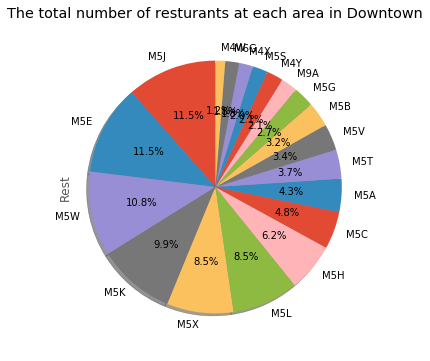

In [35]:
rest_df['Rest'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('The total number of resturants at each area in Downtown')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

### We can easy to find that top restruant has 50% restauant in Downtown.
### Let's show them on the map, let's see where has most of people at downtown.

In [36]:
rest_df
rest_df_top5 = rest_df.head()
rest_df_top5.reset_index()

,PostalCode,Rest
0,M5J,65
1,M5E,65
2,M5W,61
3,M5K,56
4,M5X,48


In [37]:
data_rest_top5 = pd.merge(dt_data, rest_df_top5, on = ['PostalCode'], how = 'inner')
data_rest_top5

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Rest
0,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,65
1,M5J,Downtown Toronto,"Harbourfront East,Toronto Islands,Union Station",43.640816,-79.381752,65
2,M5K,Downtown Toronto,"Design Exchange,Toronto Dominion Centre",43.647177,-79.381576,56
3,M5W,Downtown Toronto,Stn A PO Boxes 25 The Esplanade,43.646435,-79.374846,61
4,M5X,Downtown Toronto,"First Canadian Place,Underground city",43.648429,-79.382280,48


In [38]:
top5_map = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, neighborhood in zip(data_rest_top5['Latitude'], data_rest_top5['Longitude'], data_rest_top5['Neighborhood']):
    label = folium.Popup(neighborhood, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 10,
        popup = label,
        color ='green',
        fill = True,
        fill_color = '#3199cc',
        fill_opacity = 1).add_to(top5_map) 
    
top5_map

### So, we can easy to find the best location to open a new restaurant.
### It's should be the center of these 5 loactions area.
### Compare with these 5 loactions restaurants, we can adjust the center of these 5 groups restaurants by numbers of weights
#### The best loaction = top1 * weight(Number) + top2 * weight(Number) + top3 * weight(Number) + top4 * weight(Number) +  top5 * weight(Number)


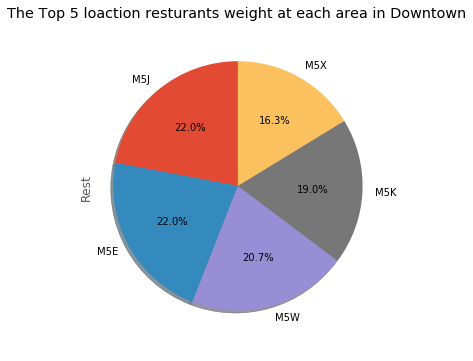

In [39]:
#rest_df_top5

rest_df_top5['Rest'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('The Top 5 loaction resturants weight at each area in Downtown')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

### As the picture above, each loaction has close weight. We just pick the center of these loactions.
### Which is should be close to the Toronto Union Station